<a href="https://colab.research.google.com/github/Susanna-Salata/Sigma-University/blob/main/Sigma_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
'''

Виконала: Сусанна Салата
Homework_1, варіант 4,

І рівень складності:
Закон зміни похибки – рівномірний;
Закон зміни досліджуваного процесу (тренду) – лінійний.
Реальні дані – 3 показника на вибір.


Package                      Version
---------------------------- -----------

pip                          23.1
numpy                        1.23.5
pandas                       1.5.3
xlrd                         2.0.1
matplotlib                   3.6.2

'''

import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline

import re
from bs4 import BeautifulSoup
import requests
import json


In [49]:
# ---------------------- ФУНКЦІЇ тестової аддитивної моделі -------------------------

# ----------- рівномірний закон розводілу номерів АВ в межах вибірки ----------------
def randomAM (n):

    '''

    :param n: кількість реалізацій ВВ - об'єм вибірки
    :return: номери АВ
    '''

    SAV = np.zeros((nAV))
    S = np.zeros((n))
    for i in range(n):
        S[i] = np.random.randint(0, iter)  # параметри закону задаются межами аргументу
    mS = np.median(S)
    dS = np.var(S)
    scvS = mt.sqrt(dS)
    # -------------- генерація номерів АВ за рівномірним законом  -------------------
    for i in range(nAV):
        SAV[i] = mt.ceil(np.random.randint(1, iter))  # рівномірний розкид номерів АВ в межах вибірки розміром 0-iter
    print('номери АВ: SAV=', SAV)
    print('----- статистичні характеристики РІВНОМІРНОГО закону розподілу ВВ -----')
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('-----------------------------------------------------------------------')
    # гістограма закону розподілу ВВ
    plt.hist(S, bins=20, facecolor="blue", alpha=0.5)
    plt.show()
    return SAV


# ------------------------- нормальний закон розводілу ВВ ----------------------------
def randoNORM(dm, dsig, iter):
    '''

    :param dm:
    :param dsig:
    :param iter:
    :return:
    '''

    S = np.random.normal(dm, dsig, iter)  # Нормальний закон розподілу ВВ з вибіркою об'ємом iter та параметрами: dm, dsig
    mS = np.median(S)
    dS = np.var(S)
    scvS = mt.sqrt(dS)
    print('------- статистичні характеристики НОРМАЛЬНОЇ похибки вимірів -----')
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('------------------------------------------------------------------')
    # гістограма закону розподілу ВВ
    plt.hist(S, bins=20, facecolor="blue", alpha=0.5)
    plt.show()
    return S


In [50]:
# ------------------- модель ідеального тренду (лінійний закон)  ------------------
def Model (n):
    S0=np.zeros((n))
    for i in range(n):
        S0[i]=(0.025*i+10)    # лінійна модель реального процесу
    return S0

# ---------------- модель виміру (квадратичний закон) з нормальний шумом ---------------
def Model_NORM (SN, S0N, n):
    SV=np.zeros((n))
    for i in range(n):
        SV[i] = S0N[i]+SN[i]
    return SV

# ----- модель виміру (лінійний закон) з нормальний шумом + АНОМАЛЬНІ ВИМІРИ
def Model_NORM_AV (S0, SV, nAV, Q_AV):
    SV_AV = SV
    SSAV = np.random.uniform(dm, (Q_AV * dsig), nAV)  # аномальна випадкова похибка з рівномірним законом
    for i in range(nAV):
        k=int (SAV[i])
        SV_AV[k] = S0[k] + SSAV[i]        # аномальні вимірів з рівномірно розподіленими номерами
    return SV_AV

# --------------- графіки тренда, вимірів з нормальним шумом  ---------------------------
def Plot_AV (S0_L, SV_L, Text):
    plt.clf()
    plt.plot(SV_L)
    plt.plot(S0_L)
    plt.ylabel(Text)
    plt.show()
    return

In [51]:
# ----- статистичні характеристики вхідної вибірки  --------
def Stat_characteristics_in (SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter ))
    for i in range(iter):
        SL0[i] = SL[i] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    print('------------', Text ,'-------------')
    print('кількість елементів вбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('-----------------------------------------------------')
    return

# ----- статистичні характеристики лінії тренда  --------
def Stat_characteristics_out (SL_in, SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter ))
    for i in range(iter):
        SL0[i] = SL[i,0] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    # глобальне лінійне відхилення оцінки - динамічна похибка моделі
    Delta = 0
    for i in range(iter):
        Delta = Delta + abs(SL_in[i] - Yout[i, 0])
    Delta_average_Out = Delta / (iter + 1)
    print('------------', Text ,'-------------')
    print('кількість елементів ивбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('Динамічна похибка моделі=', Delta_average_Out)
    print('-----------------------------------------------------')
    return

# ----- статистичні характеристики екстраполяції  --------
def Stat_characteristics_extrapol (koef, SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter ))
    for i in range(iter):
        SL0[i] = SL[i,0] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    #  довірчий інтервал прогнозованих значень за СКВ
    scvS_extrapol = scvS * koef
    print('------------', Text ,'-------------')
    print('кількість елементів ивбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('Довірчий інтервал прогнозованих значень за СКВ=', scvS_extrapol)
    print('-----------------------------------------------------')
    return

# ------------- МНК згладжуваннядля визначення стат. характеристик -------------
def MNK_Stat_characteristics (S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    Yout=F.dot(C)
    return Yout


# ------------------------------ МНК згладжування -------------------------------------
def MNK (S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    Yout=F.dot(C)
    print('Регресійна модель:')
    print('y(t) = ', C[0,0], ' + ', C[1,0], ' * t', ' + ', C[2,0], ' * t^2')
    return Yout

# ------------------------ МНК детекція та очищення АВ ------------------------------
def MNK_AV_Detect (S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    return C[1,0]

# ---------------------------  МНК ПРОГНОЗУВАННЯ -------------------------------
def MNK_Extrapol (S0, koef):
    iter = len(S0)
    Yout_Extrapol = np.zeros((iter+koef, 1))
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    print('Регресійна модель:')
    print('y(t) = ', C[0, 0], ' + ', C[1, 0], ' * t', ' + ', C[2, 0], ' * t^2')
    for i in range(iter+koef):
        Yout_Extrapol[i, 0] = C[0, 0]+C[1, 0]*i+(C[2, 0]*i*i)   # проліноміальна крива МНК - прогнозування
    return Yout_Extrapol


номери АВ: SAV= [ 814. 4546. 4091. 2033. 4699. 8994. 3239. 1793. 4130. 6511. 4124. 3065.
 4858. 4804. 8094. 6717. 4575. 7611. 2571. 4540. 8238. 3139. 5761. 8503.
  357. 6938. 9283. 6294. 6386. 6526.  155. 3553. 2546. 6426. 7828. 5044.
 2553. 7749. 1985. 8582. 6670. 6970. 2646. 3097.  293. 9449. 9667. 1296.
 4634. 6022. 8135. 3999. 1421. 1382. 2768.  808. 8449. 7350.  533.  275.
  733. 3240. 1371.  711. 5311. 5347. 4852. 4267. 4456. 1657. 9606. 3305.
 6745. 2447. 8022. 3034. 8629. 5483. 7383. 7956. 8178. 6615. 3606.  302.
 4395. 3865. 7659. 6033. 8624. 6200. 2399. 9167. 3671. 2783. 9610. 9120.
   46.  151. 6157. 2317. 6071. 8913. 4810. 7273. 6893. 8655. 3406. 1494.
 9946.  908. 5190. 3940. 1519. 8076. 8255. 2346. 9853. 9835. 4522. 7863.
 3284. 8821. 3722. 3228. 8697. 8569. 6858. 6153. 8451. 9038. 3704. 3406.
 5919. 7296. 8506. 1991. 4154.  369. 1122. 5355. 6322. 2336.  781. 2184.
 9232. 7462. 4371. 4071. 4138. 3458. 2473. 6417. 6137. 6705. 7751. 6609.
 1236. 9559.  451. 1292.  107. 2032

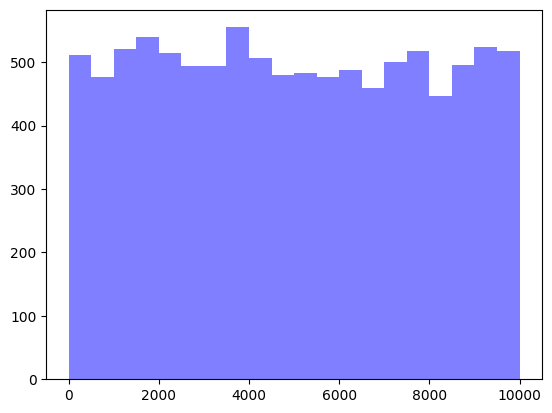

------- статистичні характеристики НОРМАЛЬНОЇ похибки вимірів -----
матиматичне сподівання ВВ= 0.09830857749286681
дисперсія ВВ = 24.54811687890349
СКВ ВВ= 4.9546056229435145
------------------------------------------------------------------


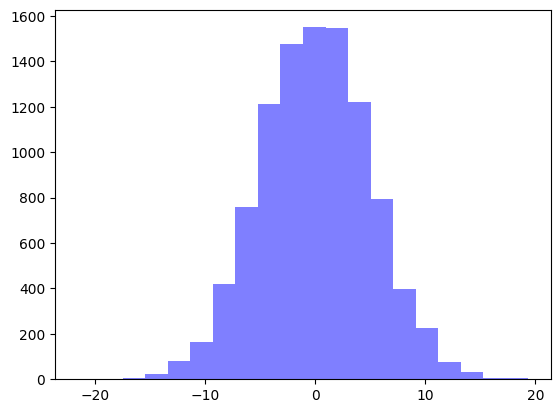

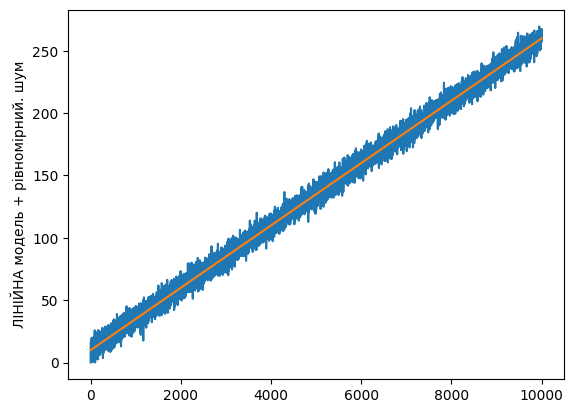

------------ Вибірка + рівномірний. шум -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= 0.09171648036436864
дисперсія ВВ = 24.545064399785183
СКВ ВВ= 4.954297568756361
-----------------------------------------------------


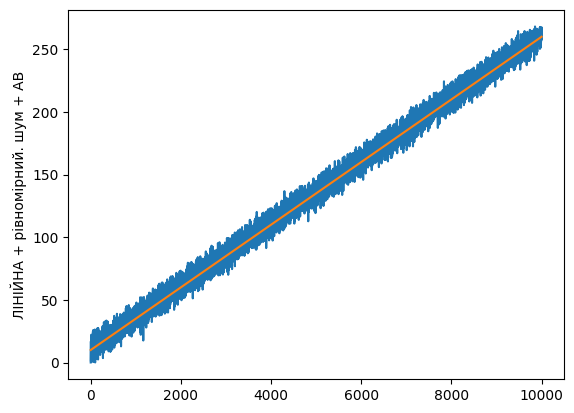

------------ Вибірка з АВ -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.03580456111507857
дисперсія ВВ = 28.458720768567215
СКВ ВВ= 5.334671570824882
-----------------------------------------------------


In [52]:
# -------------------------------- БЛОК ГОЛОВНИХ ВИКЛИКІВ ------------------------------


# ------------------------------ Джерело вхідних даних ---------------------------

# ------------------------------ сегмент констант ---------------------------
n = 10000
iter = int(n)  # кількість реалізацій ВВ
Q_AV = 3  # коефіцієнт переваги АВ
nAVv = 10
nAV = int((iter * nAVv) / 100)  # кількість АВ у відсотках та абсолютних одиницях
dm = 0
dsig = 5  # параметри нормального закону розподілу ВВ: середне та СКВ

# ------------------------------ сегмент даних ---------------------------

# ------------ виклики функцій моделей: тренд, аномального та нормального шуму  ----------
S0 = Model(n)  # модель ідеального тренду (квадратичний закон)
SAV = randomAM(n)  # модель рівномірних номерів АВ
S = randoNORM(dm, dsig, iter)  # модель нормальних помилок

# ----------------------------- Нормальні похибки ------------------------------------
SV = Model_NORM(S, S0, n)  # модель тренда + нормальних помилок
Plot_AV(S0, SV, 'ЛІНІЙНА модель + рівномірний. шум')
Stat_characteristics_in(SV, 'Вибірка + рівномірний. шум')

# ----------------------------- Аномальні похибки ------------------------------------
SV_AV = Model_NORM_AV(S0, SV, nAV, Q_AV)  # модель тренда + нормальних помилок + АВ
Plot_AV(S0, SV_AV, 'ЛІНІЙНА + рівномірний. шум + АВ')
Stat_characteristics_in(SV_AV, 'Вибірка з АВ')

In [53]:
#print(SAV)

In [54]:
# ------------------------ ФУНКЦІЯ парсингу реальних даних --------------------------

def file_parsing (URL, File_name, Data_name):
    d = pd.read_excel(File_name)
    for name, values in d[[Data_name]].items():
        print(values)
    S_real = np.zeros((len(values)))
    for i in range(len(values)):
        S_real[i] = values[i]
    print('Джерело даних: ', URL)
    return S_real

0      27.70
1      27.75
2      27.78
3      27.75
4      27.85
       ...  
343    40.10
344    39.95
345    39.80
346    39.80
347    39.80
Name: Купівля, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


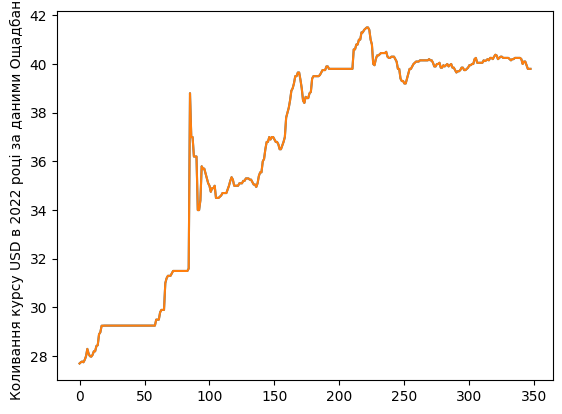

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -0.09548375755082894
дисперсія ВВ = 0.9891767028531209
СКВ ВВ= 0.9945736286736748
-----------------------------------------------------


In [56]:
# -------------------------------- БЛОК ГОЛОВНИХ ВИКЛИКІВ ------------------------------

# ------------------------------ Джерело вхідних даних ---------------------------

SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive', '/Oschadbank (USD).xls', 'Купівля')  # реальні дані

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

0      28.10
1      28.12
2      28.12
3      28.10
4      28.20
       ...  
343    40.80
344    40.70
345    40.60
346    40.60
347    40.55
Name: Продаж, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


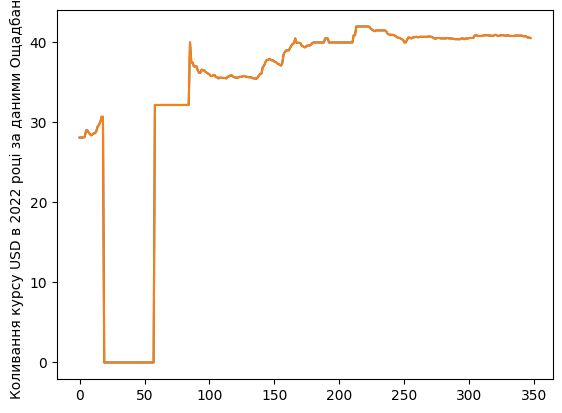

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= 0.2243231691173122
дисперсія ВВ = 63.896746894523595
СКВ ВВ= 7.993544075973035
-----------------------------------------------------


In [57]:
# ------------------------------ Джерело вхідних даних ---------------------------

SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive', '/Oschadbank (USD).xls', 'Продаж')  # реальні дані

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

0      27.9998
1      27.9619
2      27.9795
3      27.8756
4      28.0346
        ...   
343    36.5686
344    36.5686
345    36.5686
346    36.5686
347    36.5686
Name: КурсНбу, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


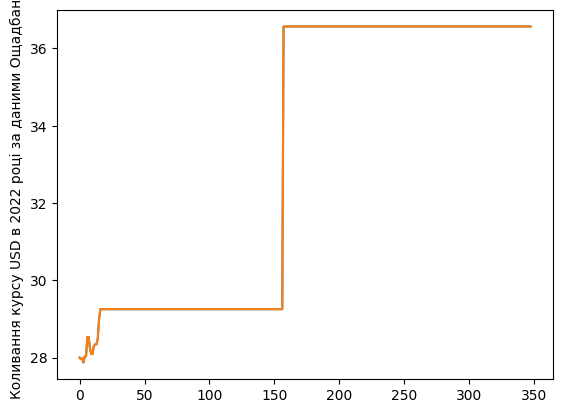

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= 0.08564579524963989
дисперсія ВВ = 3.0992465419830304
СКВ ВВ= 1.7604677054643831
-----------------------------------------------------


In [68]:
# ------------------------------ Джерело вхідних даних ---------------------------

SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive', '/Oschadbank (USD).xls', 'КурсНбу')  # реальні дані
SV_AV=pd.DataFrame(SV_AV).replace(0, np.NaN).ffill()
SV_AV=np.array(SV_AV)

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

In [139]:
'''
Аналіз отриманих результатів - верифікація математичних моделей та результатів розрахунків.

1. Задані характеристики вхідної вибірка:
часова надмірність даних із квадратичним законом;
статистичні характеристики:
    закон розподілу ВВ - нормальний
    n = 10000   # кількість реалізацій ВВ - об'єм вибірки
    dm = 0
    dsig = 5    # параметри нормального закону розподілу ВВ: середнє та СКВ

2. Визначені характеристики вхідної вибірки:
    часова надмірність даних із ЛІНІЙНИМ законом підтверджена графіком;

    статистичні характеристики:
    закон розподілу ВВ - РІВНОМІРНИЙ, підтверджено гістограмою;
    -----------------------------------------------------------------------

----- статистичні характеристики РІВНОМІРНОГО закону розподілу ВВ -----
    матиматичне сподівання ВВ= 4918.5
    дисперсія ВВ = 8417572.295387752
    СКВ ВВ= 2901.3052744217994

    ------------------------------------------------------------------

    ------- статистичні характеристики НОРМАЛЬНОЇ похибки вимірів -----
    матиматичне сподівання ВВ= 0.09830857749286681
    дисперсія ВВ = 24.54811687890349
    СКВ ВВ= 4.9546056229435145
    ------------------------------------------------------------------


    ------------ Вибірка + рівномірний. шум -------------
    кількість елементів вбірки= 10000
    матиматичне сподівання ВВ= 0.09171648036436864
    дисперсія ВВ = 24.545064399785183
    СКВ ВВ= 4.954297568756361
    -----------------------------------------------------

    -------------------------------------------------------------------

    ------------ Вибірка з АВ -------------
    кількість елементів вбірки= 10000
    матиматичне сподівання ВВ= -0.03580456111507857
    дисперсія ВВ = 28.458720768567215
    СКВ ВВ= 5.334671570824882
    -----------------------------------------------------


3. Висновок
Відповідність заданих та обрахованих числових характеристик статистичної вибірки доводять адекватність розрахунків.
Розроблений скрипт можна використовувати для визначення статистичних характеристик реальних даних.

'''
print("END")

END
